<a href="https://colab.research.google.com/github/grace3999/PPs/blob/master/Kaggle_GOSSIS_dl_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
#install packages
!pip install category-encoders

     |████████████████████████████████| 102kB 2.8MB/s 


In [0]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import scipy as sp
import missingno as msno
import pickle

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('poster', rc={'font.size':35,
                              'axes.titlesize':50,
                              'axes.labelsize':35})

#machine learning
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC 
#import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, roc_auc_score, classification_report

pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [0]:
#data paths
train_data_path = '/content/gdrive/My Drive/Colab_projects/GOSSIS_kaggle/training_v2.csv'
unlabeled_data_path = '/content/gdrive/My Drive/Colab_projects/GOSSIS_kaggle/unlabeled.csv'

In [5]:
data = pd.read_csv(train_data_path)
data = pd.DataFrame(data = data)

print('Original data shape:\n', data.shape, '\n')
print('Group value counts:\n', data['hospital_death'].value_counts(), '\n')

data.head()

Original data shape:
 (91713, 186) 

Group value counts:
 0    83798
1     7915
Name: hospital_death, dtype: int64 



,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [0]:
#organize param names

data_meta = ['encounter_id', 'patient_id', 'hospital_id', 'icu_id']

param_cat = ['ethnicity', 'gender', 'icu_admit_source', 'hospital_admit_source', 'icu_stay_type', 'icu_type', 
       'apache_3j_bodysystem', 'apache_2_bodysystem']

param_baics_apache = ['hospital_death', 'age', 'bmi', 'height', 'weight', 'pre_icu_los_days',
                      'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob',
 'albumin_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache',
       'hematocrit_apache',  'map_apache',
       'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache',
       'resprate_apache', 'sodium_apache', 'temp_apache',
       'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'elective_surgery', 'readmission_status', 'arf_apache', 'apache_post_operative', 'intubated_apache',
        'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis']
 
param_vitals = ['hospital_death', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max',
       'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_invasive_max',
       'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_invasive_max',
       'h1_diasbp_invasive_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_invasive_max',
       'h1_mbp_invasive_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min',
       'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min',
       'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'h1_sysbp_noninvasive_max',
       'h1_sysbp_noninvasive_min', 'h1_temp_max', 'h1_temp_min']
       
param_labs = ['hospital_death', 'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max',
       'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_calcium_max',
       'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min',
       'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min',
       'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_hematocrit_max',
       'd1_hematocrit_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max',
       'd1_lactate_min', 'd1_platelets_max', 'd1_platelets_min',
       'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max',
       'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'h1_albumin_max',
       'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min',
       'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min',
       'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max',
       'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min',
       'h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_hematocrit_max',
       'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_max',
       'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min',
       'h1_potassium_max', 'h1_potassium_min', 'h1_sodium_max',
       'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min']

param_labs_blood = ['hospital_death', 'd1_arterial_pco2_max', 'd1_arterial_pco2_min',
       'd1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_po2_max',
       'd1_arterial_po2_min', 'd1_pao2fio2ratio_max',
       'd1_pao2fio2ratio_min', 'h1_arterial_pco2_max',
       'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min',
       'h1_arterial_po2_max', 'h1_arterial_po2_min',
       'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min']

### Feature selection for continuous variables - remove autocorr




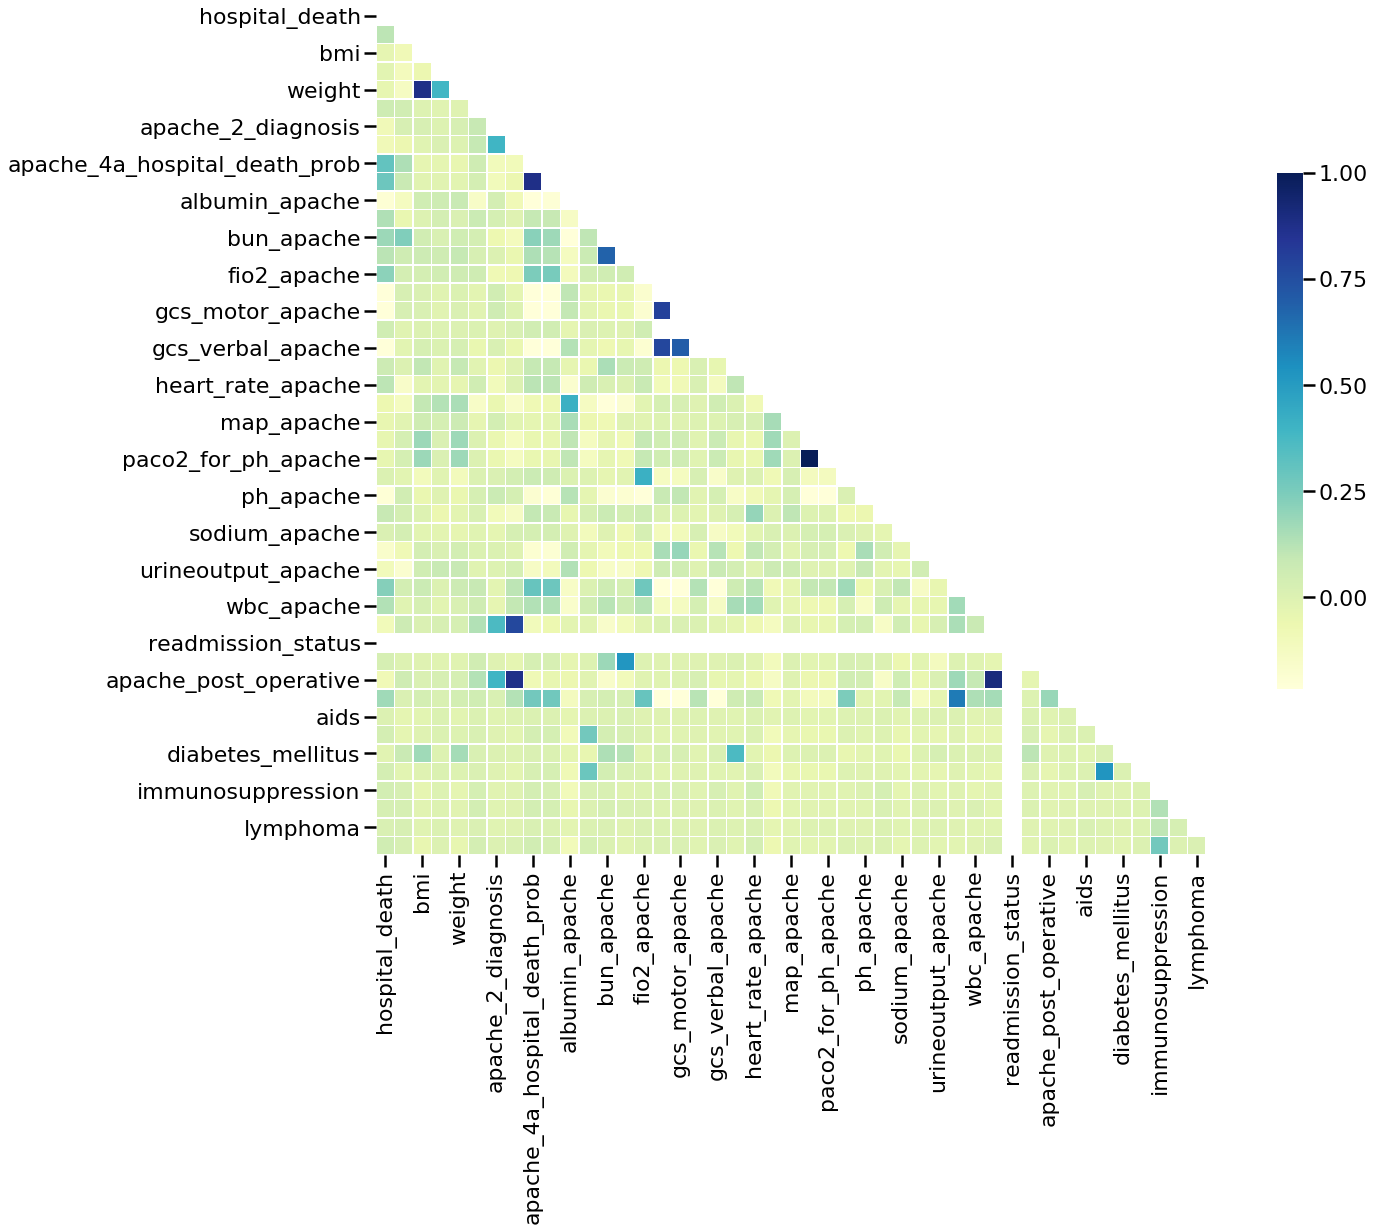

In [0]:
#explore autocorrelation across data set
corr = data[param_baics_apache].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(19,19))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu", robust=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [0]:
#remove non-invasive and invasive (highly corr with regular measure), only use d1 (not h1 - lots of missing and corr with d1)
features_comb = ['hospital_death', 'ethnicity', 'gender', 'icu_admit_source', 'hospital_admit_source', 'icu_stay_type', 'icu_type', 
       'apache_3j_bodysystem', 'apache_2_bodysystem', 
                 'age', 'bmi', 
                 'apache_4a_icu_death_prob',
                 'fio2_apache',
                 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 
                 'urineoutput_apache', 'ventilated_apache', 'elective_surgery', 'intubated_apache',
                 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 
                 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis',
                 'd1_diasbp_max', 'd1_diasbp_min', 
                   'd1_heartrate_max', 'd1_heartrate_min', 
                   'd1_mbp_max', 'd1_mbp_min', 
                   'd1_resprate_max', 'd1_resprate_min',
                   'd1_spo2_max', 'd1_spo2_min', 
                   'd1_sysbp_max', 'd1_sysbp_min',
                   'd1_temp_max', 'd1_temp_min',
                 'd1_albumin_max', 'd1_albumin_min', 
              'd1_bilirubin_max', 'd1_bilirubin_min', 
              'd1_bun_max', 'd1_bun_min', 
              'd1_calcium_max', 'd1_calcium_min', 
              'd1_creatinine_max', 'd1_creatinine_min',
              'd1_glucose_max', 'd1_glucose_min', 
              'd1_hco3_max', 'd1_hco3_min',
              'd1_hemaglobin_max', 'd1_hemaglobin_min', 
              'd1_hematocrit_max', 'd1_hematocrit_min', 
              'd1_inr_max', 'd1_inr_min', 
              'd1_lactate_max', 'd1_lactate_min', 
              'd1_platelets_max', 'd1_platelets_min',
              'd1_potassium_max', 'd1_potassium_min', 
              'd1_sodium_max', 'd1_sodium_min', 
              'd1_wbc_max', 'd1_wbc_min',
                    'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min']

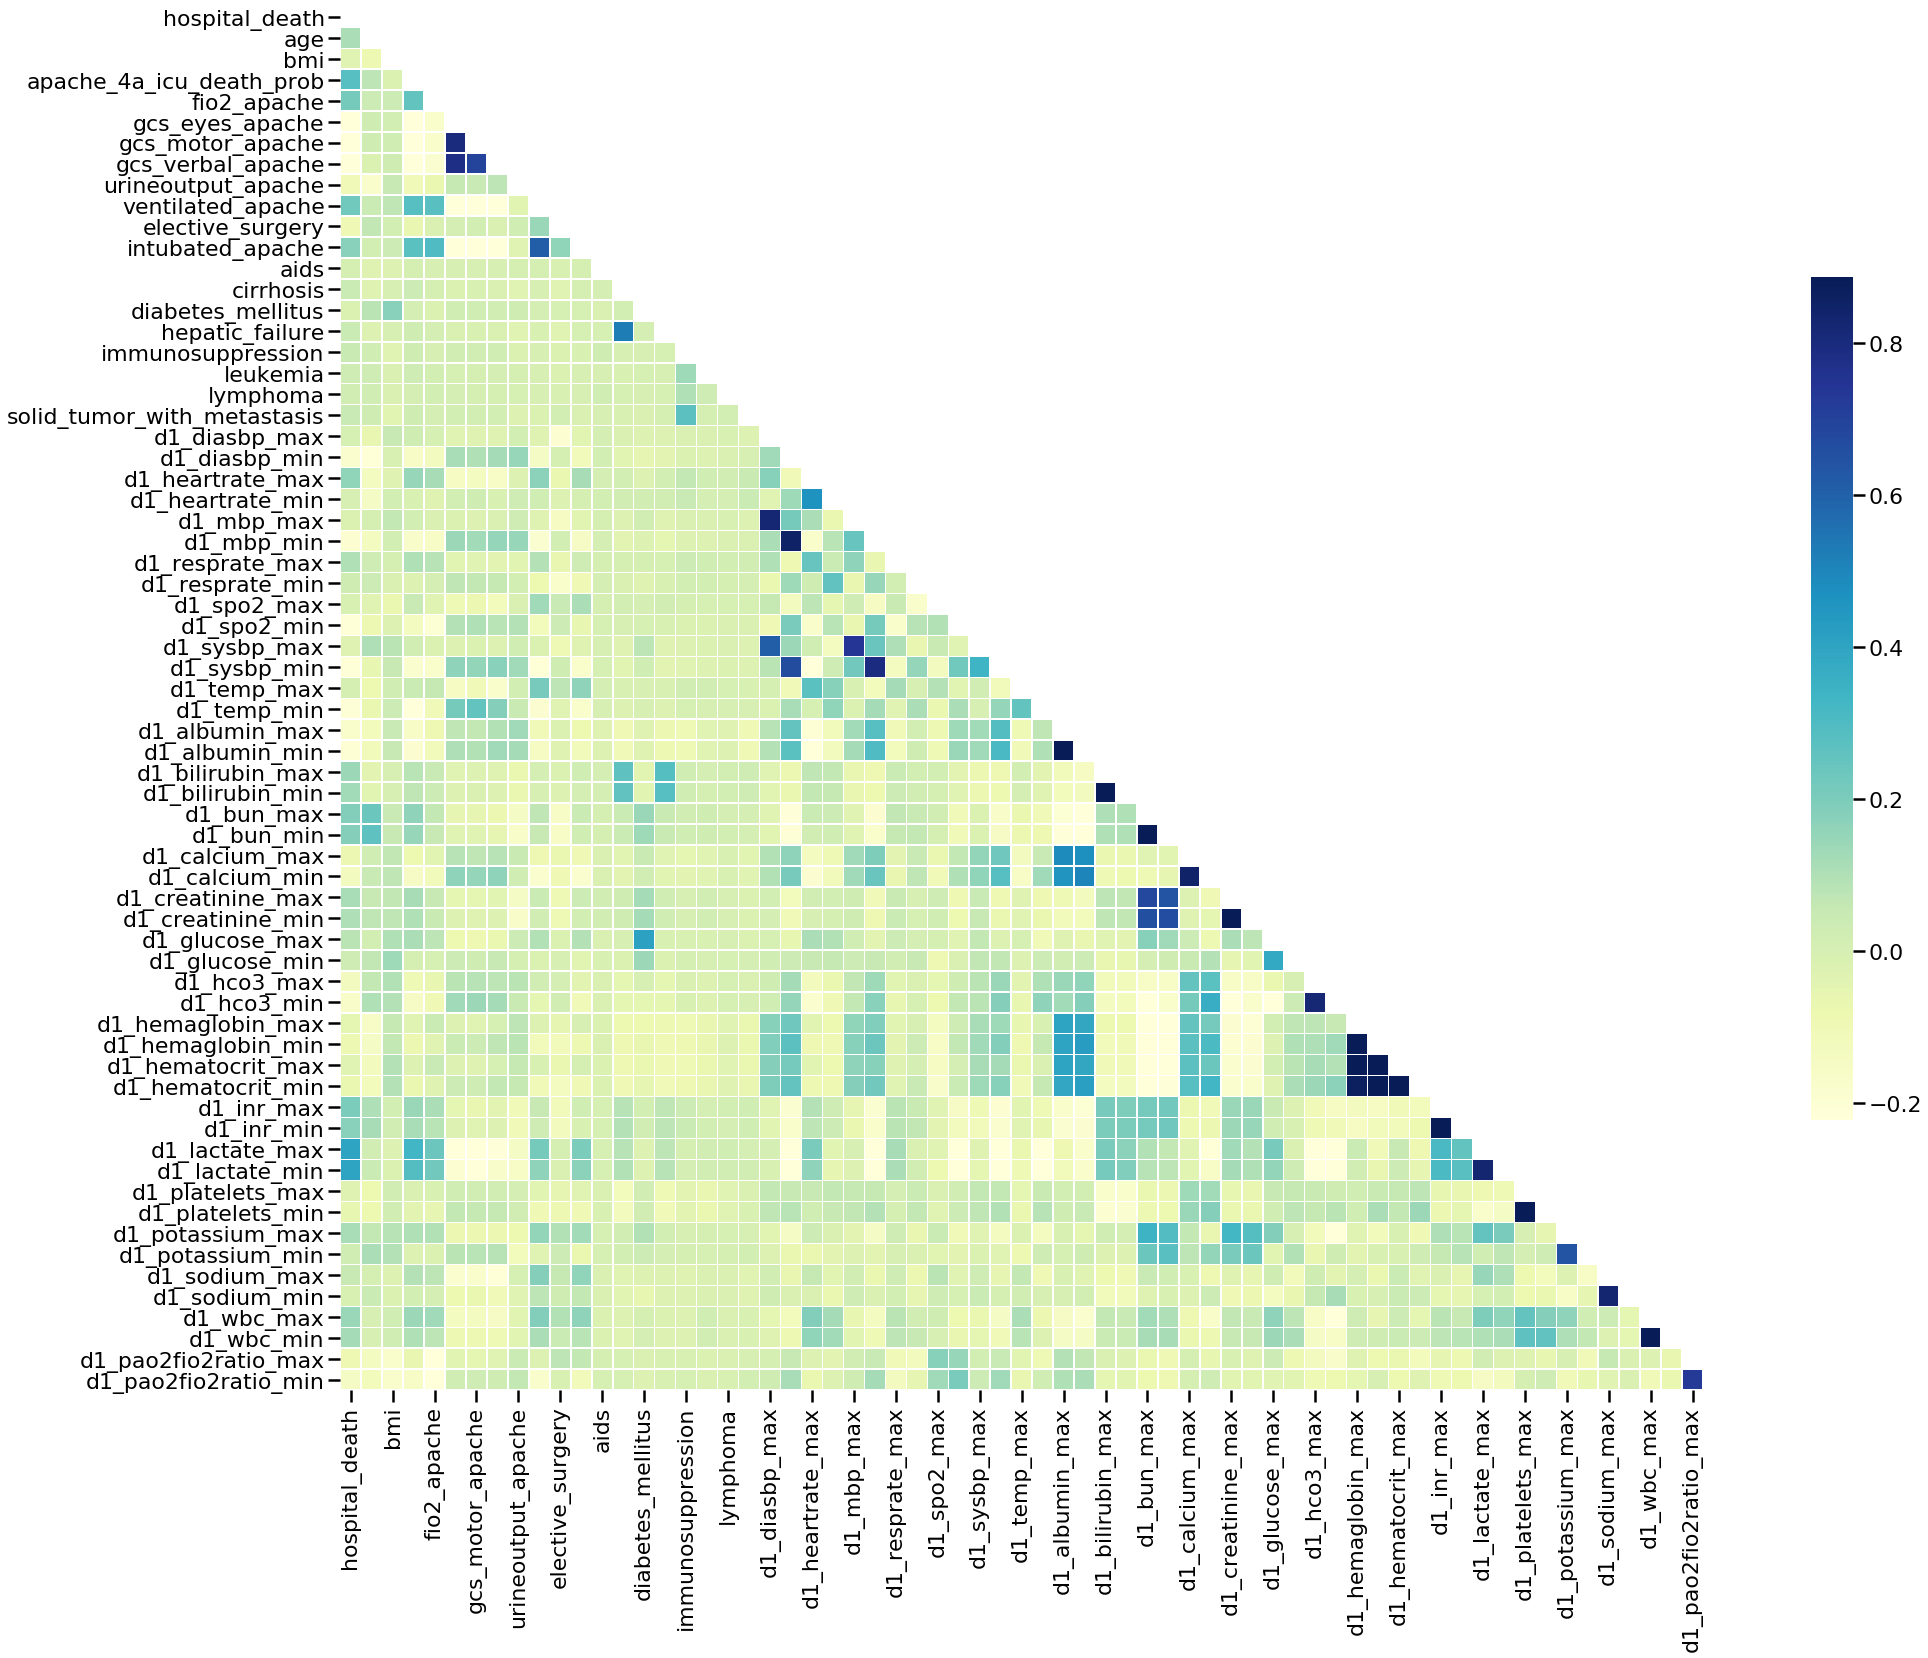

In [0]:
#explore autocorrelation across data set
corr = data[features_comb].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(31,31))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu", robust=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})


### Categorical viz and encoding - cat variables are important in health so want to encode using model instead of one-hot etc.


ethnicity


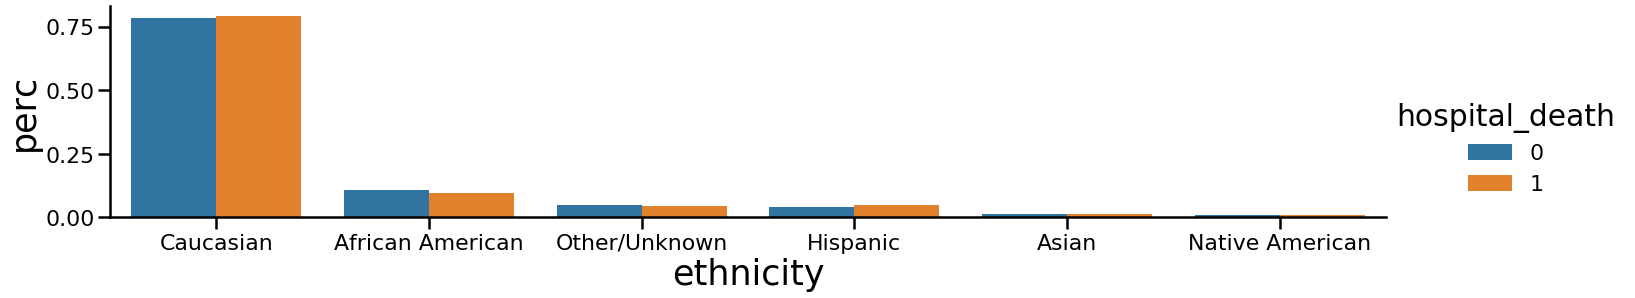



gender


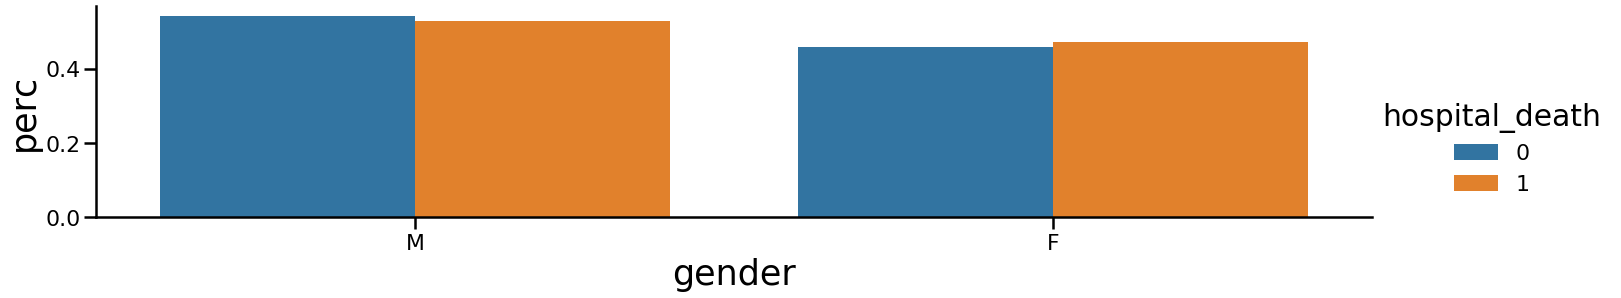



icu_admit_source


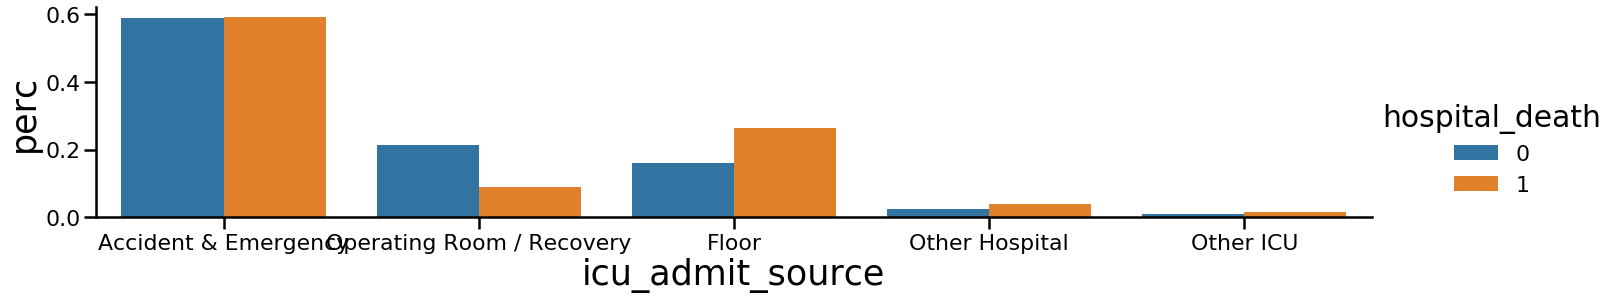



hospital_admit_source


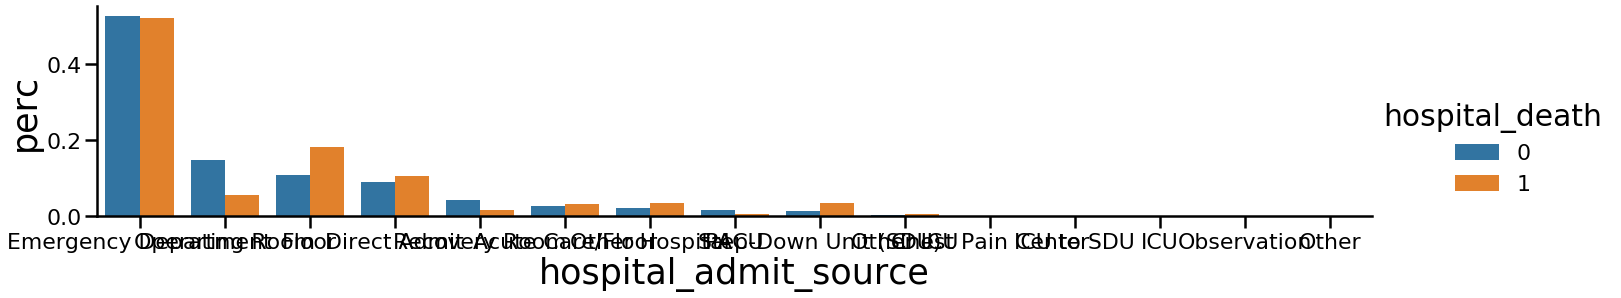



icu_stay_type


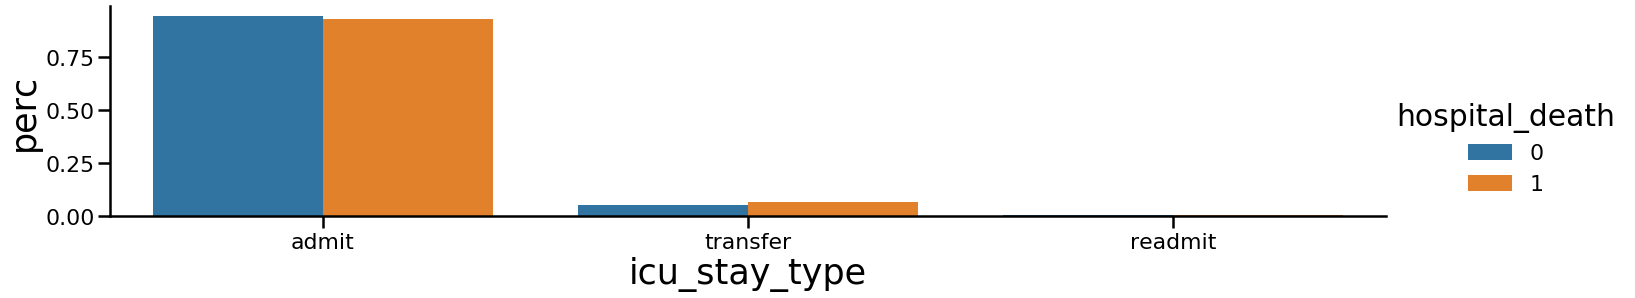



icu_type


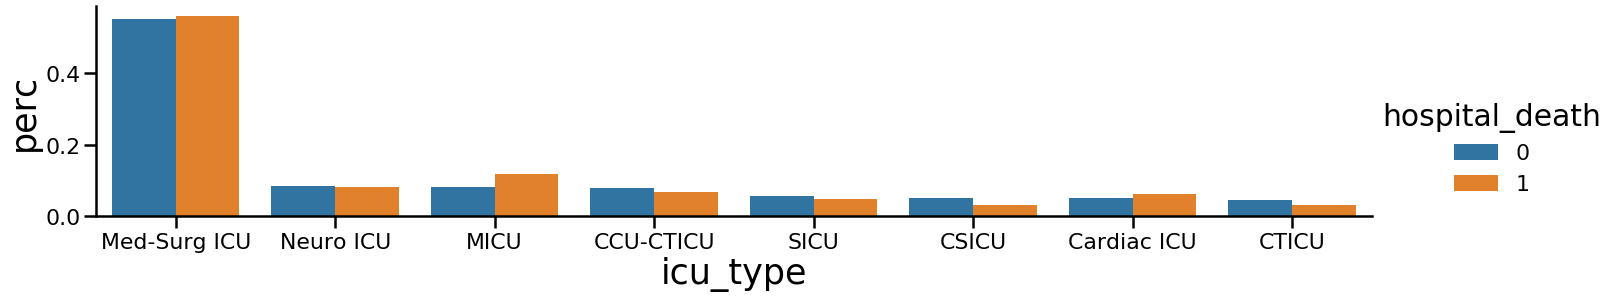



apache_3j_bodysystem


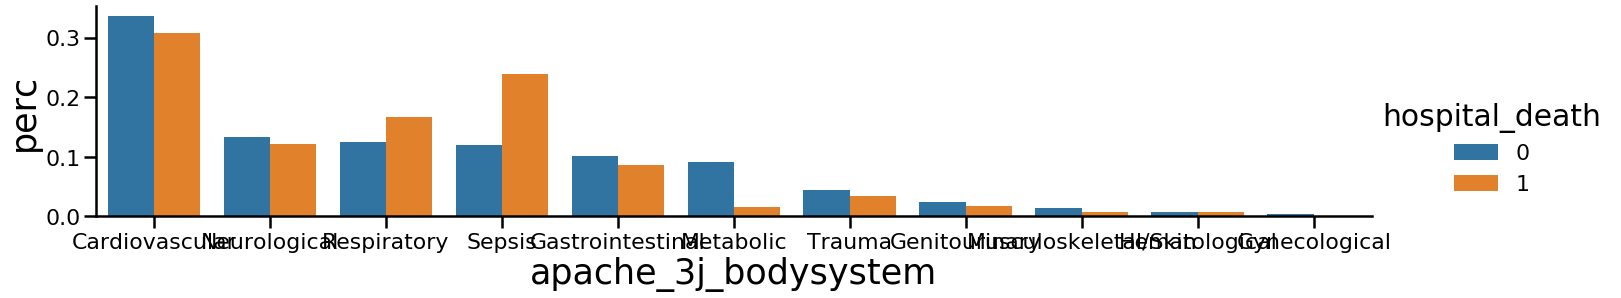



apache_2_bodysystem


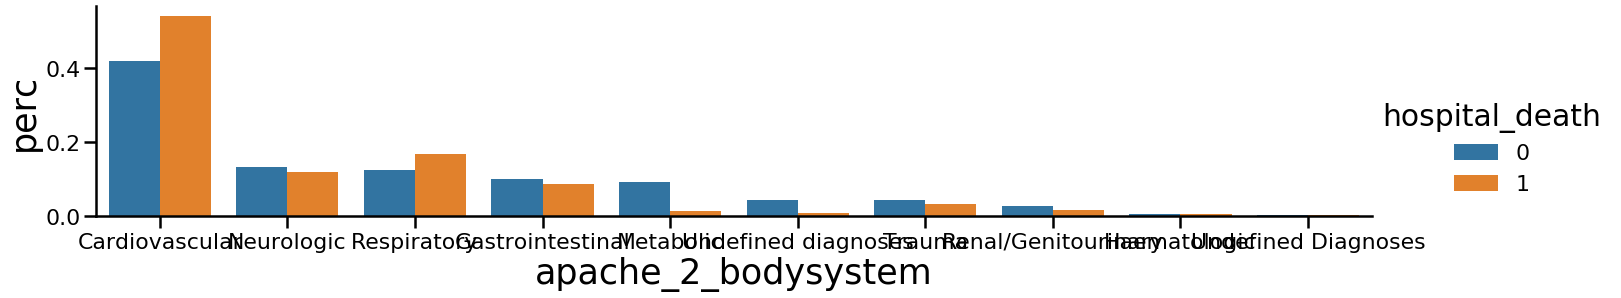

In [0]:
for param in data[param_cat]:
    print(param)

    data_int = (data.groupby('hospital_death')[param].value_counts() /
                        data.groupby('hospital_death')[param].count()).reset_index(name='perc')
        
    try:
        g = sns.catplot(x=param, y='perc', kind='bar', data=data_int, hue='hospital_death', ci=68, height=5, aspect=4)
        plt.show()
        
        print('\n')
        
    except:
        pass

In [0]:
param_cat = ['ethnicity', 'gender', 'icu_admit_source', 'hospital_admit_source', 'icu_stay_type', 'icu_type', 
       'apache_3j_bodysystem', 'apache_2_bodysystem']

features_comb = ['hospital_death', 'ethnicity', 'gender', 'icu_admit_source', 'hospital_admit_source', 'icu_stay_type', 'icu_type', 
       'apache_3j_bodysystem', 'apache_2_bodysystem', 
                 'age', 'bmi', 
                 'apache_4a_icu_death_prob',
                 'fio2_apache',
                 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 
                 'urineoutput_apache', 'ventilated_apache', 'elective_surgery', 'intubated_apache',
                 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 
                 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis',
                 'd1_diasbp_max', 'd1_diasbp_min', 
                   'd1_heartrate_max', 'd1_heartrate_min', 
                   'd1_mbp_max', 'd1_mbp_min', 
                   'd1_resprate_max', 'd1_resprate_min',
                   'd1_spo2_max', 'd1_spo2_min', 
                   'd1_sysbp_max', 'd1_sysbp_min',
                   'd1_temp_max', 'd1_temp_min',
                 'd1_albumin_max', 'd1_albumin_min', 
              'd1_bilirubin_max', 'd1_bilirubin_min', 
              'd1_bun_max', 'd1_bun_min', 
              'd1_calcium_max', 'd1_calcium_min', 
              'd1_creatinine_max', 'd1_creatinine_min',
              'd1_glucose_max', 'd1_glucose_min', 
              'd1_hco3_max', 'd1_hco3_min',
              'd1_hemaglobin_max', 'd1_hemaglobin_min', 
              'd1_hematocrit_max', 'd1_hematocrit_min', 
              'd1_inr_max', 'd1_inr_min', 
              'd1_lactate_max', 'd1_lactate_min', 
              'd1_platelets_max', 'd1_platelets_min',
              'd1_potassium_max', 'd1_potassium_min', 
              'd1_sodium_max', 'd1_sodium_min', 
              'd1_wbc_max', 'd1_wbc_min',
                    'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min']

#encode categorical variables using targetencoder - will need to retrain on fianl feature set
data_cat_train = data[features_comb]

Y_train = data_cat_train['hospital_death']
X_train = data_cat_train[features_comb]


# use target encoding to encode two categorical features
enc = ce.TargetEncoder(cols=param_cat).fit(X_train, Y_train)
cat_enc_data = enc.transform(X_train)

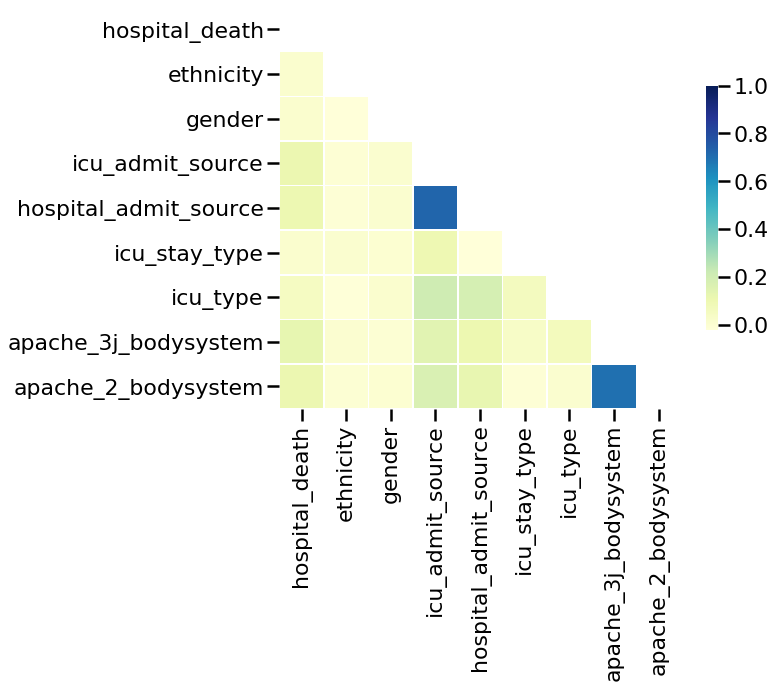

In [0]:
#explore autocorrelation across categorical variables after encoding
param_cat = ['hospital_death', 'ethnicity', 'gender', 'icu_admit_source', 'hospital_admit_source', 'icu_stay_type', 'icu_type', 
       'apache_3j_bodysystem', 'apache_2_bodysystem']


corr = cat_enc_data[param_cat].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9,9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu", robust=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [0]:
#remove non-invasive and invasive (highly autocorr with regular measure), only use d1 (not h1 - lots of missing and autocorr with d1), remove cat variables that are highly autocorr, remove min/max or low corr with outcome
features_comb = ['hospital_death', 'ethnicity', 'gender', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'age', 'bmi',
       'apache_4a_icu_death_prob', 'fio2_apache', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_verbal_apache', 'urineoutput_apache',
       'ventilated_apache', 'elective_surgery', 'intubated_apache',
       'd1_diasbp_min',
       'd1_heartrate_max', 
       'd1_mbp_min',
       'd1_resprate_max',  
       'd1_spo2_min',
       'd1_sysbp_min',
       'd1_temp_min',
       'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max',
       'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 
       'd1_calcium_min', 
       'd1_creatinine_max', 'd1_creatinine_min',
       'd1_hco3_max', 'd1_hco3_min',
       'd1_inr_max', 'd1_inr_min', 'd1_lactate_max',
       'd1_lactate_min', 
       'd1_potassium_max', 
       'd1_wbc_max', 'd1_wbc_min',
       'd1_pao2fio2ratio_min']

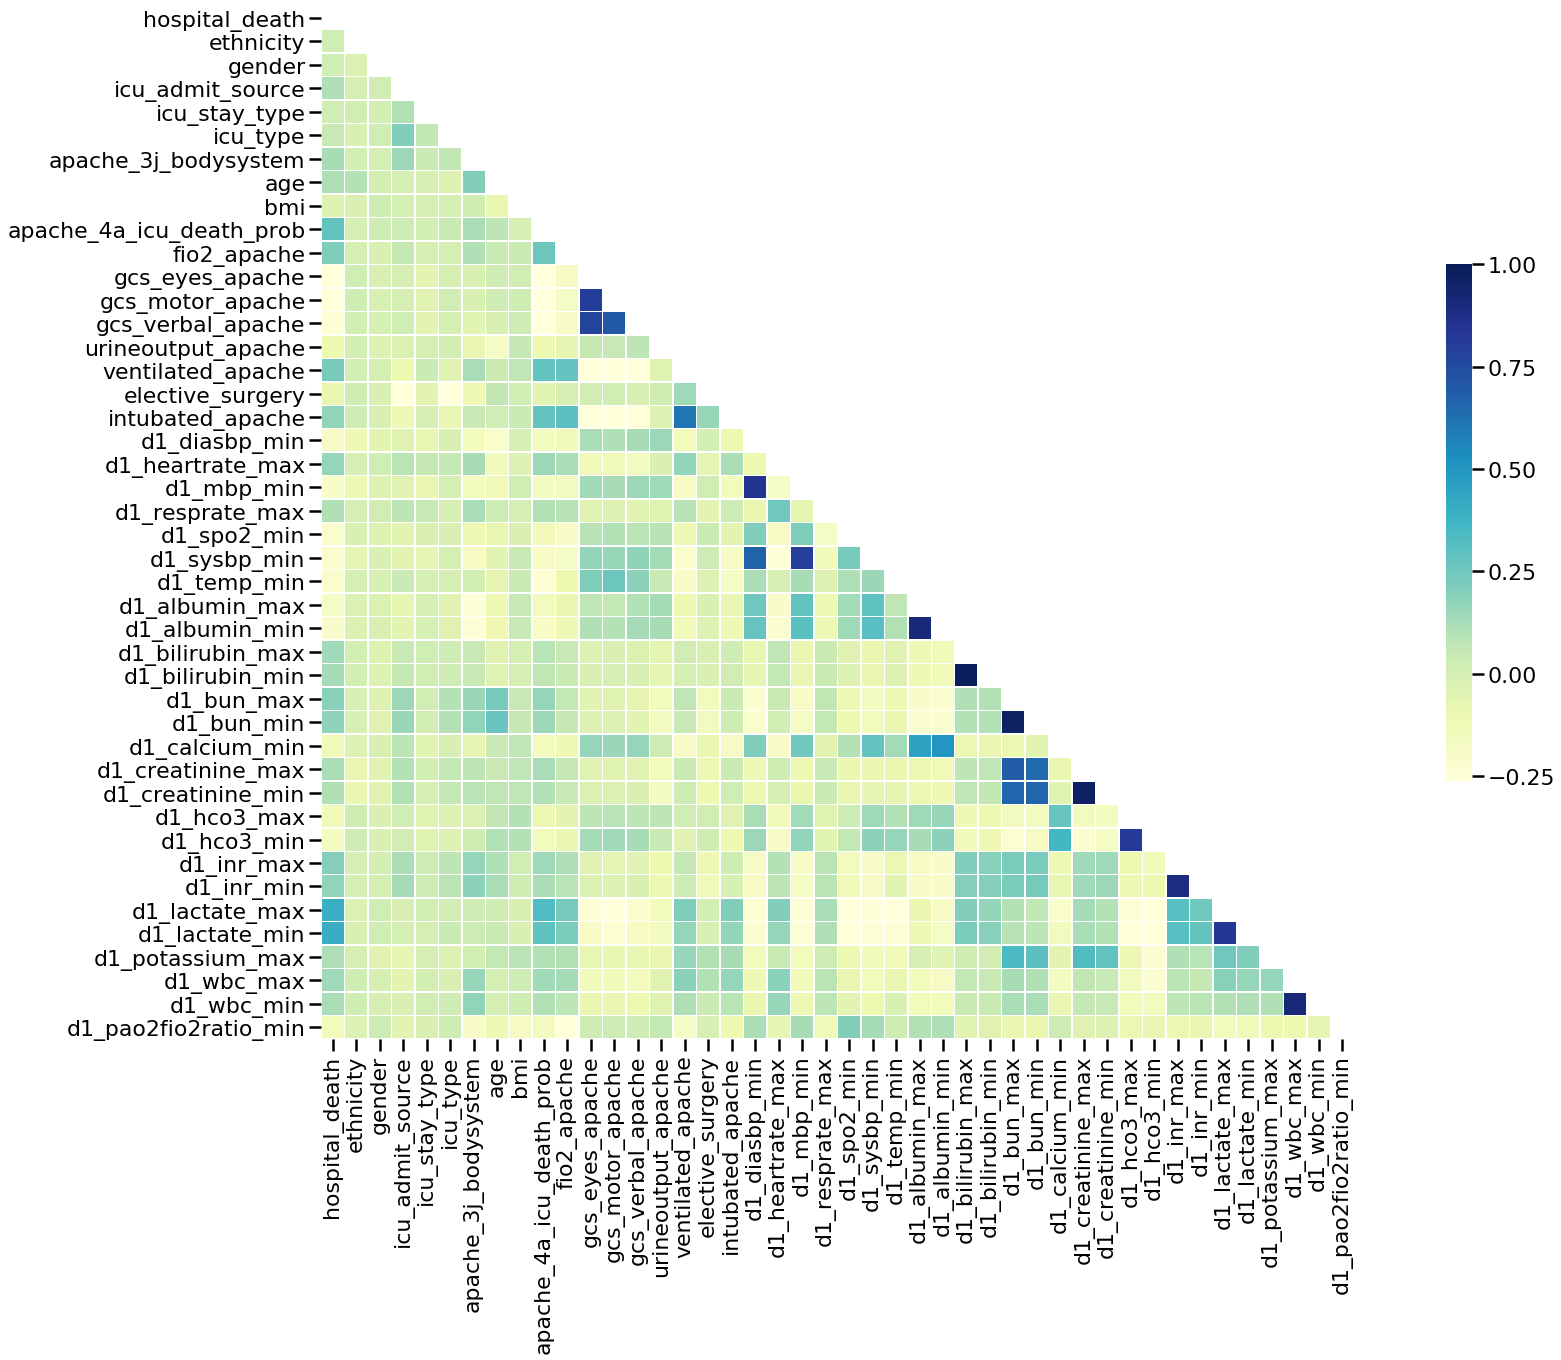

In [0]:
#explore autocorrelation across data set
corr = cat_enc_data[features_comb].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(33, 19))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu", robust=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [0]:
#retrain cat encoder using final feature set
cat_features = ['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem']

features_comb = ['hospital_death', 'ethnicity', 'gender', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'age', 'bmi',
       'apache_4a_icu_death_prob', 'fio2_apache', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_verbal_apache', 'urineoutput_apache',
       'ventilated_apache', 'elective_surgery', 'intubated_apache',
       'd1_diasbp_min',
       'd1_heartrate_max', 
       'd1_mbp_min',
       'd1_resprate_max',  
       'd1_spo2_min',
       'd1_sysbp_min',
       'd1_temp_min',
       'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max',
       'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 
       'd1_calcium_min', 
       'd1_creatinine_max', 'd1_creatinine_min',
       'd1_hco3_max', 'd1_hco3_min',
       'd1_inr_max', 'd1_inr_min', 'd1_lactate_max',
       'd1_lactate_min', 
       'd1_potassium_max', 
       'd1_wbc_max', 'd1_wbc_min',
       'd1_pao2fio2ratio_min']

data_cat_train = data[features_comb]

Y_train = data_cat_train['hospital_death']
X_train = data_cat_train[features_comb]


# use target encoding to encode categorical features
enc = ce.TargetEncoder(cols=cat_features).fit(X_train, Y_train)
cat_enc_data = enc.transform(X_train)

#pickel model to save for later use with test set
save_path = '/content/gdrive/My Drive/Colab_projects/GOSSIS_kaggle/'

#cat encoder
pkl_filename = str(save_path + "cat_encode_model.pkl")  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(enc, file)

### Impute missing data


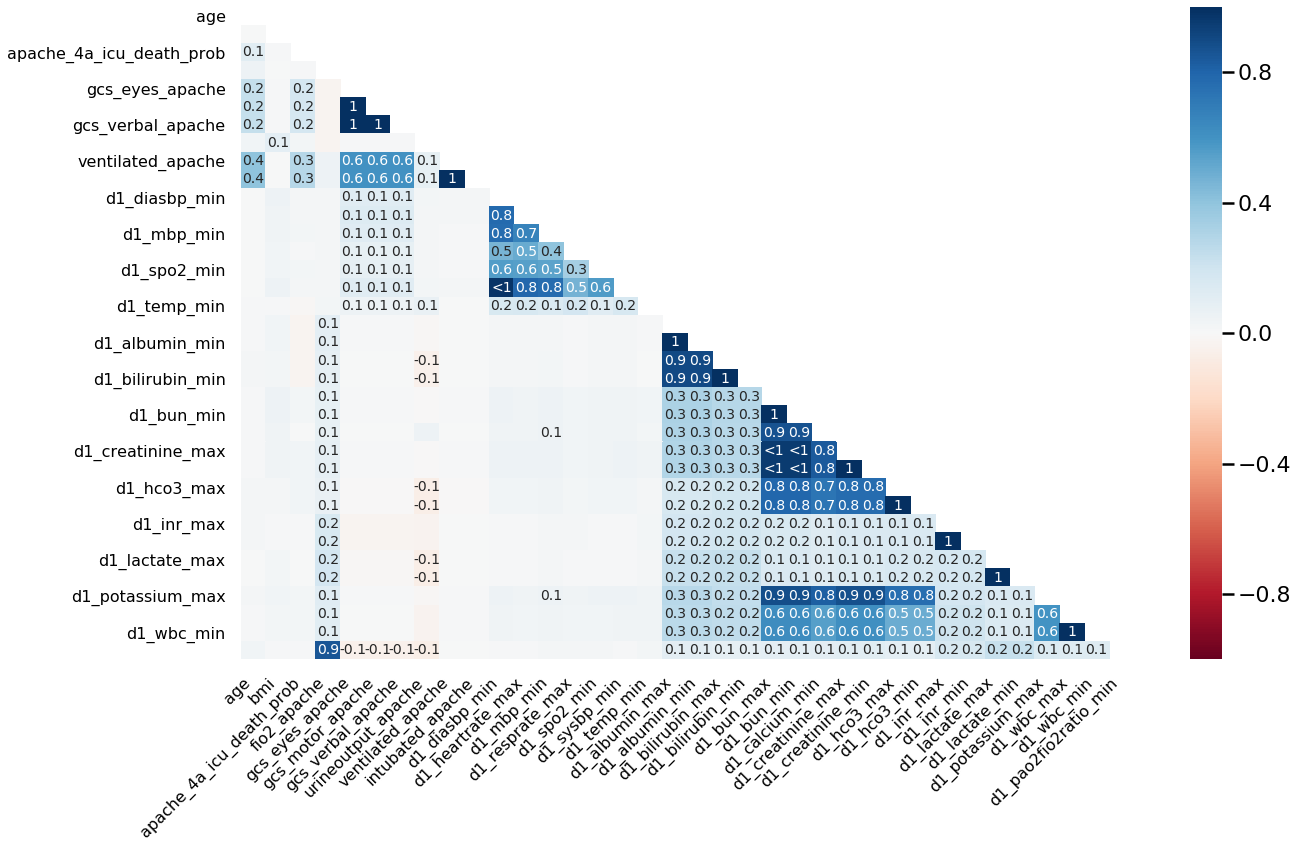

In [0]:
#use missingo to viz missing data
msno.heatmap(cat_enc_data[features_comb])

In [9]:
#impute missing data for features
features_comb_no_death = ['ethnicity', 'gender', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'age', 'bmi',
       'apache_4a_icu_death_prob', 'fio2_apache', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_verbal_apache', 'urineoutput_apache',
       'ventilated_apache', 'elective_surgery', 'intubated_apache',
       'd1_diasbp_min',
       'd1_heartrate_max', 
       'd1_mbp_min',
       'd1_resprate_max',  
       'd1_spo2_min',
       'd1_sysbp_min',
       'd1_temp_min',
       'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max',
       'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 
       'd1_calcium_min', 
       'd1_creatinine_max', 'd1_creatinine_min',
       'd1_hco3_max', 'd1_hco3_min',
       'd1_inr_max', 'd1_inr_min', 'd1_lactate_max',
       'd1_lactate_min', 
       'd1_potassium_max', 
       'd1_wbc_max', 'd1_wbc_min',
       'd1_pao2fio2ratio_min']

imp = IterativeImputer(max_iter=999, random_state=39, verbose=2).fit(cat_enc_data[features_comb_no_death])
cat_enc_data_imp = imp.transform(cat_enc_data[features_comb_no_death])

#save model
pkl_filename = str(save_path + "impute_model_999iter.pkl")  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(imp, file)

[IterativeImputer] Completing matrix with shape (91713, 43)
[IterativeImputer] Ending imputation round 1/999, elapsed time 10.75
[IterativeImputer] Change: 3056.079445222963, scaled tolerance: 8.716669631999999 
[IterativeImputer] Ending imputation round 2/999, elapsed time 21.55
[IterativeImputer] Change: 2899.448508511211, scaled tolerance: 8.716669631999999 
[IterativeImputer] Ending imputation round 3/999, elapsed time 32.39
[IterativeImputer] Change: 12174.177750123961, scaled tolerance: 8.716669631999999 
[IterativeImputer] Ending imputation round 4/999, elapsed time 43.14
[IterativeImputer] Change: 4733.750632387953, scaled tolerance: 8.716669631999999 
[IterativeImputer] Ending imputation round 5/999, elapsed time 53.85
[IterativeImputer] Change: 7723.649668276023, scaled tolerance: 8.716669631999999 
[IterativeImputer] Ending imputation round 6/999, elapsed time 64.64
[IterativeImputer] Change: 3981.629939947572, scaled tolerance: 8.716669631999999 
[IterativeImputer] Ending i

In [14]:
#create final data set
final_data = pd.DataFrame(data=cat_enc_data_imp, columns=cat_enc_data[features_comb_no_death].columns.values)
#put back correct hospital death
final_data['hospital_death'] = cat_enc_data['hospital_death']
final_data.to_csv(str(save_path + "'final_data_43feat_999imp.csv"))
final_data.head()

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,age,bmi,apache_4a_icu_death_prob,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,urineoutput_apache,ventilated_apache,elective_surgery,intubated_apache,d1_diasbp_min,d1_heartrate_max,d1_mbp_min,d1_resprate_max,d1_spo2_min,d1_sysbp_min,d1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_hco3_max,d1_hco3_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_potassium_max,d1_wbc_max,d1_wbc_min,d1_pao2fio2ratio_min,hospital_death
0,0.087262,0.084417,0.134136,0.085168,0.060205,0.157922,68.0,22.730000,0.050000,0.499412,3.000000,6.000000,4.000000,2207.184100,0.0,0.0,0.0,37.0,119.0,46.0,34.0,74.0,73.0,37.2,2.300000,2.300000,0.400000,0.400000,31.000000,30.000000,7.400000,2.510000,2.230000,19.000000,15.000000,1.600481,1.540064,1.300000,1.000000,4.000000,14.100000,14.100000,233.250539,0
1,0.087262,0.088373,0.134136,0.085168,0.087495,0.112068,77.0,27.420000,0.290000,1.000000,1.000000,3.000000,1.000000,1890.308032,1.0,0.0,0.0,31.0,118.0,38.0,32.0,70.0,67.0,35.1,1.600000,1.600000,0.500000,0.500000,11.000000,9.000000,8.000000,0.710000,0.560000,27.000000,26.000000,1.300000,1.300000,3.500000,3.500000,4.200000,23.300000,12.700000,51.000000,0
2,0.087262,0.088373,0.086385,0.085168,0.087495,0.015163,25.0,31.950000,0.000000,0.345549,3.000000,6.000000,5.000000,2282.144722,0.0,0.0,0.0,48.0,96.0,68.0,21.0,91.0,105.0,36.7,3.467035,3.401749,1.171876,1.103548,12.658792,10.454063,8.293828,1.273892,1.124272,24.232088,22.454789,1.039711,1.026252,0.914317,0.856574,4.123477,9.609346,9.059174,344.734210,0
3,0.087262,0.088373,0.037300,0.085168,0.060205,0.079669,81.0,22.640000,0.030000,0.600000,4.000000,6.000000,5.000000,1197.735553,1.0,1.0,1.0,42.0,116.0,84.0,23.0,95.0,84.0,34.8,3.112537,2.925046,0.142943,-0.029765,27.001781,23.760881,7.899158,1.570749,1.361834,23.753573,21.570032,1.600000,1.100000,2.893039,1.969654,5.000000,9.000000,8.000000,236.666667,0
4,0.087262,0.084417,0.086385,0.085168,0.087495,0.067413,19.0,32.254461,-0.075442,0.327368,3.726474,5.808432,4.676817,2603.304738,0.0,0.0,0.0,57.0,89.0,90.0,18.0,96.0,120.0,36.7,3.512755,3.459528,1.130255,1.077894,10.056527,8.786230,8.437799,1.214202,1.115957,24.675175,23.594574,1.000806,1.028179,0.157490,0.345928,4.006104,10.266123,9.886779,336.818425,0


In [0]:
features_short = ['d1_lactate_max', 'd1_lactate_min', 'apache_4a_icu_death_prob', 
                  'fio2_apache', 'ventilated_apache', 'd1_inr_max', 'd1_inr_min', 'd1_bun_max', 
                  'intubated_apache', 'd1_bun_min', 'd1_heartrate_max', 'd1_wbc_max', 'apache_3j_bodysystem', 
                  'd1_wbc_min', 'age', 'icu_admit_source', 'd1_potassium_max', 'd1_creatinine_max', 'd1_bilirubin_max', 'd1_resprate_max']


features_comb_no_death = ['ethnicity', 'gender', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'age', 'bmi',
       'apache_4a_icu_death_prob', 'fio2_apache', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_verbal_apache', 'urineoutput_apache',
       'ventilated_apache', 'elective_surgery', 'intubated_apache',
       'd1_diasbp_min',
       'd1_heartrate_max', 
       'd1_mbp_min',
       'd1_resprate_max',  
       'd1_spo2_min',
       'd1_sysbp_min',
       'd1_temp_min',
       'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max',
       'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 
       'd1_calcium_min', 
       'd1_creatinine_max', 'd1_creatinine_min',
       'd1_hco3_max', 'd1_hco3_min',
       'd1_inr_max', 'd1_inr_min', 'd1_lactate_max',
       'd1_lactate_min', 
       'd1_potassium_max', 
       'd1_wbc_max', 'd1_wbc_min',
       'd1_pao2fio2ratio_min']

#split data
train, test = train_test_split(final_data, test_size = .3, random_state=1, stratify = final_data['hospital_death'])

Y_train = train['hospital_death']
Y_test = test['hospital_death']


X_train = train[features_comb_no_death]
X_test = test[features_comb_no_death]


In [0]:
#scale data algo
scaler = StandardScaler()

#k fold algo
strat_k_fold = StratifiedKFold(n_splits=10)

#classifier algos
dm_cv = DummyClassifier(strategy='stratified', random_state=39)
lr_cv = LogisticRegression(random_state=39, class_weight='balanced')
rf_cv = RandomForestClassifier(random_state=39, class_weight='balanced')
knn_cv = KNeighborsClassifier()
ab_cv = AdaBoostClassifier(random_state=39)
gb_cv = GradientBoostingClassifier(random_state=39)
svm_cv = SVC(kernel='linear', probability=True, class_weight='balanced') 

#dic with classifier and feature importance attribute name
models_dic = {'dm_cv': (dm_cv, 'none'), 
              'lr_cv': (lr_cv, 'coef'), 
              'rf_cv': (rf_cv, 'feature_importance'), 
              'knn_cv': (knn_cv, 'none'),  
              'ab_cv': (ab_cv, 'feature_importance'),
              'gb_cv': (gb_cv, 'feature_importance'),
              'svm_cv':(svm_cv, 'coef')}



In [0]:
def feature_importance(X, y, model_instance, feature_names, fi_name):
    #takes in features (X) and classess (y), model, column names for features in X, and name of attribute for feature importance
    #returns dictionary of feature names and coef/feature importance values
    
    feature_importance_dic = {}
    
    model_instance.fit(X, y)
    
    if fi_name == 'coef':
        coef = model_instance.coef_[0]
        feature_importance_dic = dict(zip(feature_names, coef))
    if fi_name == 'feature_importance':
        coef = model_instance.feature_importances_
        feature_importance_dic = dict(zip(feature_names, coef))
    if fi_name == 'none':
        coef = np.zeros(len(feature_names))
        feature_importance_dic = dict(zip(feature_names, coef))
    
    return feature_importance_dic

In [0]:
def classification_pipeline(X, y, cv_instance, model_instance, feature_names, fi_name):
    
    #scale data
    data_scaled = scaler.fit_transform(X)
    
    #generate cross-val sets
    cv = list(cv_instance.split(data_scaled, y))
    
    #predict class and predict probability 
    y_pred = cross_val_predict(model_instance, data_scaled, y, cv=cv, method='predict')
    y_pred_prob = cross_val_predict(model_instance, data_scaled, y, cv=cv, method='predict_proba')
    
    #generate confusion matrix
    conf_mat = confusion_matrix(y, y_pred)
    print('Confusion matrix:', conf_mat)
    
    #generate ROC_AUC
    ROC_AUC = metrics.roc_auc_score(y, y_pred_prob[:,1])
    print("ROC_AUC: ", ROC_AUC)
    
    # generate additional metrics
    recall = metrics.recall_score(y,y_pred)
    precision = metrics.precision_score(y,y_pred)
    accuracy = metrics.accuracy_score(y,y_pred)
    F1 = metrics.f1_score(y,y_pred)
    print("Sensitivity/Recall (TPR): ",recall)
    print("Precision (PPV): ", precision)
    print("Accuracy: ", accuracy)
    print("F1:", F1)
    
    #determine feature importance
    feature_dic = feature_importance(data_scaled, y, model_instance, feature_names, fi_name)
    
    #create dic
    data_dic = {}
    data_dic['y_pred'] = y_pred
    data_dic['y_pred_prob'] = y_pred_prob
    data_dic['conf_mat'] = conf_mat
    data_dic['ROC_AUC'] = ROC_AUC
    data_dic['recall'] = recall
    data_dic['precision'] = precision
    data_dic['accuracy'] = accuracy
    data_dic['F1'] = F1
    
    data_dic = {**data_dic, **feature_dic}
    
    return data_dic

In [0]:
feature_set = 'full'
feature_names = features_comb_no_death

data_full_features = {}

for name, model in models_dic.items():
    print(f'{name} model with {feature_set} features:')
    data_full_features[name + '_' + feature_set] = classification_pipeline(X_train, Y_train, strat_k_fold, model[0], feature_names, model[1])
    print('\n')

dm_cv model with full features:
Confusion matrix: [[53177  5482]
 [ 5002   538]]
ROC_AUC:  0.5018282593091578
Sensitivity/Recall (TPR):  0.09711191335740073
Precision (PPV):  0.0893687707641196
Accuracy:  0.8366952756273462
F1: 0.09307958477508652


lr_cv model with full features:
Confusion matrix: [[47172 11487]
 [ 1243  4297]]
ROC_AUC:  0.8724473542027738
Sensitivity/Recall (TPR):  0.7756317689530686
Precision (PPV):  0.27223770907247846
Accuracy:  0.8017103070141279
F1: 0.4030200712811855


rf_cv model with full features:


KeyboardInterrupt: ignored

In [0]:
data_full_features['lr_cv_full']

{'F1': 0.40530714386892674,
 'ROC_AUC': 0.8765272892467959,
 'accuracy': 0.8038131435069082,
 'age': -0.11692585991185026,
 'aids': 0.02184433319642581,
 'apache_3j_bodysystem': 0.4769872935405982,
 'apache_4a_icu_death_prob': 0.05919905252557192,
 'bmi': 0.05097590108125492,
 'cirrhosis': -0.061181043441216484,
 'conf_mat': array([[47312, 11347],
        [ 1248,  4292]]),
 'd1_albumin_max': -0.18245029048647754,
 'd1_albumin_min': 0.14071140463049953,
 'd1_bilirubin_max': -0.02346096620486912,
 'd1_bilirubin_min': -0.10715042464271998,
 'd1_bun_max': 0.35937978929722497,
 'd1_bun_min': 0.06476193032082776,
 'd1_calcium_max': 0.00043233994154271566,
 'd1_calcium_min': 0.013159643618617045,
 'd1_creatinine_max': -0.028239204837288787,
 'd1_creatinine_min': -0.06676957645189921,
 'd1_diasbp_max': -0.030096890601592034,
 'd1_diasbp_min': 0.22892319580370213,
 'd1_glucose_max': 0.12159764440131196,
 'd1_glucose_min': -0.10192111882293094,
 'd1_hco3_max': 0.062404610084829525,
 'd1_hco3_min

In [0]:
#put dics in pandas df 
final_dic = {**data_full_features}
data_pandas = pd.DataFrame.from_dict(data = final_dic, orient='index')
data_pandas.sort_values('precision', ascending=False).head()

In [0]:
#run on test data with best optimized model
#scale data
test_scaled = scaler.fit_transform(X_test)

print('GB test AUC: {}'.format(lr_cv.score(test_scaled, Y_test)))
test_pred_gb = lr_cv.predict(test_scaled)
test_pred_prob_gb = lr_cv.predict_proba(test_scaled)
print(classification_report(Y_test, test_pred_gb))
print(confusion_matrix(Y_test, test_pred_gb))

GB test AUC: 0.8104964745220615
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     25139
           1       0.29      0.80      0.42      2375

    accuracy                           0.81     27514
   macro avg       0.63      0.80      0.65     27514
weighted avg       0.92      0.81      0.85     27514

[[20408  4731]
 [  483  1892]]


In [0]:
fpr_dm, tpr_dm, thresholds_dm = metrics.roc_curve(Y_train_class, data_full_features['dm_cv_ave']['y_pred_prob'][:,1])
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(Y_train_class, data_full_features['lr_cv_ave']['y_pred_prob'][:,1])
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(Y_train_class, data_full_features['rf_cv_ave']['y_pred_prob'][:,1])
fpr_gb, tpr_gb, thresholds_gb = metrics.roc_curve(Y_train_class, data_full_features['gb_cv_ave']['y_pred_prob'][:,1])
fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve(Y_train_class, data_full_features['svm_cv_ave']['y_pred_prob'][:,1])
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(Y_train_class, data_full_features['knn_cv_ave']['y_pred_prob'][:,1])
fpr_ab, tpr_ab, thresholds_ab = metrics.roc_curve(Y_train_class, data_full_features['ab_cv_ave']['y_pred_prob'][:,1])

# plot model ROC curves
plt.plot(fpr_dm, tpr_dm, label="dm")
plt.plot(fpr_lr, tpr_lr, label="lr")
plt.plot(fpr_rf, tpr_rf, label="rf")
plt.plot(fpr_gb, tpr_gb, label="gb")
plt.plot(fpr_svm, tpr_svm, label="svm")
plt.plot(fpr_knn, tpr_knn, label="knn")
plt.plot(fpr_ab, tpr_ab, label="ada")

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize = 15)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 15)

In [0]:
# calculate precision-recall curve
precision_dm, recall_dm, thresholds_pr_dm = metrics.precision_recall_curve(Y_train_class, data_full_features['dm_cv_ave']['y_pred_prob'][:,1])
precision_lr, recall_lr, thresholds_pr_lr = metrics.precision_recall_curve(Y_train_class, data_full_features['lr_cv_ave']['y_pred_prob'][:,1])
precision_rf, recall_rf, thresholds_pr_rf = metrics.precision_recall_curve(Y_train_class, data_full_features['rf_cv_ave']['y_pred_prob'][:,1])
precision_gb, recall_gb, thresholds_pr_gb = metrics.precision_recall_curve(Y_train_class, data_full_features['gb_cv_ave']['y_pred_prob'][:,1])
precision_svm, recall_svm, thresholds_pr_svm = metrics.precision_recall_curve(Y_train_class, data_full_features['svm_cv_ave']['y_pred_prob'][:,1])
precision_knn, recall_knn, thresholds_pr_knn = metrics.precision_recall_curve(Y_train_class, data_full_features['knn_cv_ave']['y_pred_prob'][:,1])
precision_ab, recall_ab, thresholds_pr_ab = metrics.precision_recall_curve(Y_train_class, data_full_features['ab_cv_ave']['y_pred_prob'][:,1])

plt.plot(recall_dm, precision_dm, label='dm')
plt.plot(recall_lr, precision_lr, label='lr')
plt.plot(recall_rf, precision_rf, label='rf')
plt.plot(recall_gb, precision_gb, label='gb')
plt.plot(recall_svm, precision_svm, label='svm')
plt.plot(recall_knn, precision_knn, label='knn')
plt.plot(recall_ab, precision_ab, label='ada')

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend(loc="lower right")
plt.xlabel('Recall (Sensitivity)', fontsize = 15)
plt.ylabel('Precision', fontsize = 15)

# Save final models

In [0]:
#pickel model to save for later use with test set
save_path = '/content/gdrive/My Drive/Colab_projects/GOSSIS_kaggle/'

#classification model
pkl_filename = str(save_path + "classification_model.pkl")  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(enc, file)

# Use models on test set


In [0]:
data_test = pd.read_csv(unlabeled_data_path)
data_test = pd.DataFrame(data = data_test)

print('Original data shape:\n', data_test.shape, '\n')
print('Group value counts:\n', data_test['hospital_death'].value_counts(), '\n')

data_test.head()

Original data shape:
 (39308, 186) 

Group value counts:
 Series([], Name: hospital_death, dtype: int64) 



,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,2,127112,7,NaN,56.0,21.102439,0,Caucasian,M,180.3,Emergency Department,Accident & Emergency,1105,admit,Neuro ICU,0.104167,0,68.6,3.7,301.0,405.01,0,0.0,NaN,19.0,0.67,NaN,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,NaN,NaN,NaN,NaN,5.0,134.0,36.6,1121.1264,0.0,4.7,NaN,NaN,74.0,51.0,74.0,51.0,100.0,78.0,NaN,NaN,86.0,60.0,86.0,60.0,20.0,8.0,100.0,96.0,NaN,NaN,121.0,79.0,121.0,79.0,37.1,36.6,NaN,NaN,55.0,51.0,55.0,51.0,88.0,84.0,NaN,NaN,68.0,60.0,68.0,60.0,18.0,8.0,100.0,98.0,NaN,NaN,91.0,79.0,91.0,79.0,36.6,36.6,3.7,3.7,NaN,NaN,19.0,19.0,9.3,9.3,0.67,0.67,276.0,167.0,24.0,24.0,13.8,13.8,42.0,42.0,NaN,NaN,NaN,NaN,223.0,223.0,4.8,4.8,135.0,134.0,4.7,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
1,5,130737,178,NaN,NaN,19.500595,1,Caucasian,F,145.0,Operating Room,Operating 

In [0]:
features = ['hospital_death', 'ethnicity', 'gender', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'age', 'bmi',
       'apache_4a_icu_death_prob', 'fio2_apache', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_verbal_apache', 'urineoutput_apache',
       'ventilated_apache', 'elective_surgery', 'intubated_apache',
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min',
       'd1_sysbp_max', 'd1_sysbp_min', 'd1_temp_max', 'd1_temp_min',
       'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max',
       'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_calcium_max',
       'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min',
       'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min',
       'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_hematocrit_max',
       'd1_hematocrit_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max',
       'd1_lactate_min', 'd1_platelets_max', 'd1_platelets_min',
       'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max',
       'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min',
       'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min']

features_no_death = ['ethnicity', 'gender', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'age', 'bmi',
       'apache_4a_icu_death_prob', 'fio2_apache', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_verbal_apache', 'urineoutput_apache',
       'ventilated_apache', 'elective_surgery', 'intubated_apache',
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min',
       'd1_sysbp_max', 'd1_sysbp_min', 'd1_temp_max', 'd1_temp_min',
       'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max',
       'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_calcium_max',
       'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min',
       'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min',
       'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_hematocrit_max',
       'd1_hematocrit_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max',
       'd1_lactate_min', 'd1_platelets_max', 'd1_platelets_min',
       'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max',
       'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min',
       'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min']

In [0]:
#import trained models
#model path
save_path = '/content/gdrive/My Drive/Colab_projects/GOSSIS_kaggle/'

pkl_filename_cat = str(save_path + "cat_encode_model.pkl")
model_target_encoder = pickle.load(open(pkl_filename_cat, 'rb'))
print(model_target_encoder)

pkl_filename_imp = str(save_path + "impute_model_11iter.pkl")
model_impute = pickle.load(open(pkl_filename_imp, 'rb'))
print(model_impute)



TargetEncoder(cols=['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type',
                    'icu_type', 'apache_3j_bodysystem'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=True,
              smoothing=1.0, verbose=0)
IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=11, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=39,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=2)


In [0]:
data_test_cat = enc.transform(data_test[features])
data_test_cat_imp = imp.transform(data_test_cat[features_no_death])

#create final data set
final_data = pd.DataFrame(data=data_test_cat_imp, columns=data_test_cat[features_no_death].columns.values)
final_data.head()

[IterativeImputer] Completing matrix with shape (39308, 71)
[IterativeImputer] Ending imputation round 1/11, elapsed time 0.40
[IterativeImputer] Ending imputation round 2/11, elapsed time 0.78
[IterativeImputer] Ending imputation round 3/11, elapsed time 1.17
[IterativeImputer] Ending imputation round 4/11, elapsed time 1.58
[IterativeImputer] Ending imputation round 5/11, elapsed time 2.02
[IterativeImputer] Ending imputation round 6/11, elapsed time 2.43
[IterativeImputer] Ending imputation round 7/11, elapsed time 2.87
[IterativeImputer] Ending imputation round 8/11, elapsed time 3.30
[IterativeImputer] Ending imputation round 9/11, elapsed time 3.72
[IterativeImputer] Ending imputation round 10/11, elapsed time 4.16
[IterativeImputer] Ending imputation round 11/11, elapsed time 4.61


,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,age,bmi,apache_4a_icu_death_prob,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,urineoutput_apache,ventilated_apache,elective_surgery,intubated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min
0,0.087262,0.084417,0.086385,0.085168,0.083127,0.079018,56.000000,21.102439,0.08,0.361563,2.0,5.0,1.0,1121.126400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,51.0,100.0,78.0,86.0,60.0,20.0,8.0,100.0,96.0,121.0,79.0,37.1,36.6,3.700000,3.700000,0.971786,0.987809,19.0,19.0,9.3,9.3,0.67,0.67,276.0,167.0,24.000000,24.000000,13.8,13.8,42.0,42.0,1.301787,1.328907,1.666621,1.583408,223.0,223.0,4.8,4.8,135.0,134.0,4.7,4.7,331.961447,323.464202
1,0.087262,0.088373,0.037300,0.085168,0.087495,0.079018,84.179868,19.500595,0.03,0.385126,4.0,6.0,4.0,843.436800,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,31.0,73.0,60.0,108.0,53.0,33.0,16.0,99.0,90.0,148.0,83.0,37.7,36.6,3.100000,3.100000,0.600000,0.600000,12.0,12.0,8.0,8.0,0.60,0.60,100.0,100.0,31.000000,31.000000,9.9,9.9,30.9,30.9,1.406223,1.424862,0.896562,1.117482,93.0,93.0,4.4,4.4,140.0,140.0,3.0,3.0,275.592760,248.805705
2,0.078559,0.084417,0.037300,0.085168,0.075741,0.079669,66.000000,32.518596,0.02,0.421137,2.0,5.0,1.0,1728.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,57.0,117.0,86.0,110.0,71.0,28.0,10.0,100.0,95.0,172.0,102.0,37.5,35.5,3.227938,3.133239,1.269354,1.106797,22.0,19.0,8.7,8.4,1.84,1.63,117.0,81.0,22.000000,19.000000,12.7,12.2,40.9,39.2,1.424444,1.313529,2.662631,1.489769,184.0,181.0,4.7,4.5,135.0,130.0,14.8,10.0,290.825373,281.292239
3,0.087262,0.084417,0.037300,0.085168,0.087495,0.112068,64.000000,20.798520,0.17,0.700000,4.0,6.0,1.0,1434.412800,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,63.0,42.0,111.0,60.0,76.0,48.0,35.0,15.0,100.0,92.0,115.0,69.0,38.4,37.5,1.900000,1.900000,0.800000,0.800000,24.0,24.0,7.9,7.4,0.75,0.72,148.0,122.0,22.000000,20.000000,11.0,9.1,32.0,27.0,1.400000,1.400000,0.800000,0.800000,248.0,209.0,4.1,4.0,138.0,133.0,9.7,7.1,202.857143,114.000000
4,0.087262,0.084417,0.086385,0.085168,0.083127,0.079018,56.000000,30.430113,0.42,0.497787,1.0,4.0,1.0,2232.573087,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,24.0,94.0,62.0,137.0,37.0,21.0,0.0,100.0,95.0,222.0,66.0,37.9,36.0,3.500000,3.500000,0.400000,0.400000,11.0,9.0,8.2,7.7,0.67,0.52,192.0,141.0,24.526553,21.109694,12.3,11.1,36.5,32.8,1.000000,1.000000,2.393672,1.373551,223.0,218.0,4.2,3.5,150.0,134.0,14.5,14.1,340.384889,276.567167
